
# Neural Networks, Visually: Linear + Activation = Nonlinearity

**Concept:** Each neuron computes a **linear combination** of inputs, then passes it through a **nonlinear activation**.  
Stacking these layers allows the network to approximate **complex nonlinear functions**.

This notebook provides:
1. A diagram of layers (linear weights + activation blocks)  
2. A tiny forward-pass example  
3. A visual comparison: linear-only vs ReLU network on nonlinear data  
4. A 2D surface from a small MLP to show learned nonlinearity


In [1]:

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.patches import FancyBboxPatch, ArrowStyle, FancyArrowPatch
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

np.random.seed(2)



## 1) Diagram: Linear units + activation blocks

Each layer does: **z = W·x + b** → **a = φ(z)**, where φ is an activation (ReLU, tanh, etc.).  
Below, we draw a toy 3-layer MLP: Input → Linear → ReLU → Linear → ReLU → Linear → Output.


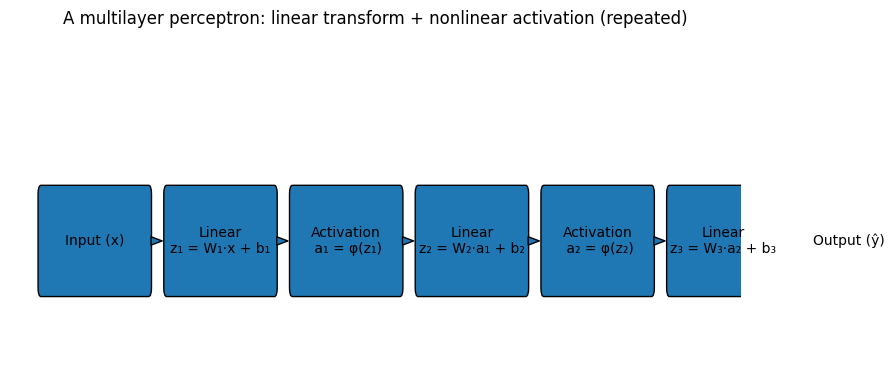

In [2]:

fig, ax = plt.subplots(figsize=(9,4))

def box(ax, xy, w, h, text):
    rect = FancyBboxPatch(xy, w, h, boxstyle="round,pad=0.02,rounding_size=0.05")
    ax.add_patch(rect)
    ax.text(xy[0]+w/2, xy[1]+h/2, text, ha="center", va="center")

def arrow(ax, p0, p1):
    arr = FancyArrowPatch(p0, p1, arrowstyle=ArrowStyle("Simple", head_length=8, head_width=6, tail_width=1.2))
    ax.add_patch(arr)

# Layout
x0, y = 0.5, 0.5
w, h = 1.9, 0.6
pad = 0.25

# Blocks
box(ax, (x0, y), w, h, "Input (x)")
box(ax, (x0+w+pad, y), w, h, "Linear\nz₁ = W₁·x + b₁")
box(ax, (x0+2*(w+pad), y), w, h, "Activation\n a₁ = φ(z₁)")
box(ax, (x0+3*(w+pad), y), w, h, "Linear\nz₂ = W₂·a₁ + b₂")
box(ax, (x0+4*(w+pad), y), w, h, "Activation\n a₂ = φ(z₂)")
box(ax, (x0+5*(w+pad), y), w, h, "Linear\nz₃ = W₃·a₂ + b₃")
box(ax, (x0+6*(w+pad), y), w, h, "Output (ŷ)")

# Arrows
for k in range(7-1):
    x_start = x0 + (k)*(w+pad) + w
    x_end   = x0 + (k+1)*(w+pad)
    arrow(ax, (x_start, y+h/2), (x_end, y+h/2))

ax.set_xlim(0, 12.5); ax.set_ylim(0, 2)
ax.axis("off")
plt.title("A multilayer perceptron: linear transform + nonlinear activation (repeated)")
plt.tight_layout(); plt.show()



## 2) Tiny forward-pass example (numbers)

We’ll compute one forward pass through a 1-hidden-layer MLP:
- **z₁ = W₁·x + b₁**, **a₁ = ReLU(z₁)**
- **z₂ = W₂·a₁ + b₂**, **ŷ = z₂** (regression output)


In [3]:

def relu(x):
    return np.maximum(0, x)

x = np.array([1.0, -2.0])            # 2-D input
W1 = np.array([[0.8, -0.3],
               [0.2,  0.5],
               [-0.6, 0.4]])         # 3 hidden units
b1 = np.array([0.1, -0.2, 0.05])
W2 = np.array([[ 0.7, -0.4, 0.2]])   # output weights (1 x 3)
b2 = np.array([0.05])

z1 = W1.dot(x) + b1
a1 = relu(z1)
z2 = W2.dot(a1) + b2
y_hat = z2[0]

print("z1 =", np.round(z1, 3))
print("a1 = ReLU(z1) =", np.round(a1, 3))
print("ŷ  =", np.round(y_hat, 3))


z1 = [ 1.5  -1.   -1.35]
a1 = ReLU(z1) = [1.5 0.  0. ]
ŷ  = 1.1



## 3) Linear-only model fails on nonlinear data


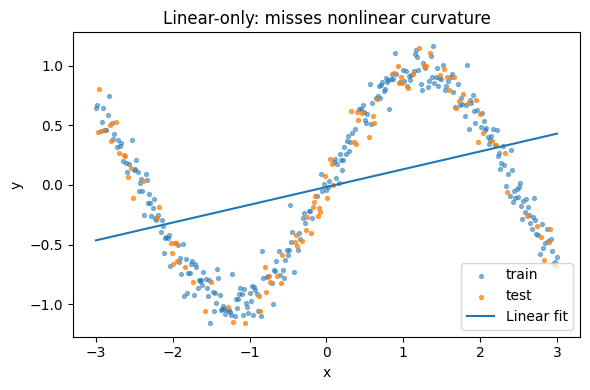

In [4]:

# Nonlinear data
n = 400
X = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.sin(1.3*X[:,0]) + 0.1*np.random.randn(n)

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.25, random_state=2)

from sklearn.linear_model import LinearRegression
lin = LinearRegression().fit(Xtr, ytr)

xg = np.linspace(-3, 3, 300).reshape(-1,1)
plt.figure(figsize=(6,4))
plt.scatter(Xtr[:,0], ytr, s=8, alpha=0.5, label="train")
plt.scatter(Xte[:,0], yte, s=8, alpha=0.7, label="test")
plt.plot(xg[:,0], lin.predict(xg), label="Linear fit")
plt.title("Linear-only: misses nonlinear curvature")
plt.xlabel("x"); plt.ylabel("y")
plt.legend(); plt.tight_layout(); plt.show()



## 4) ReLU network captures nonlinearity


/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: in

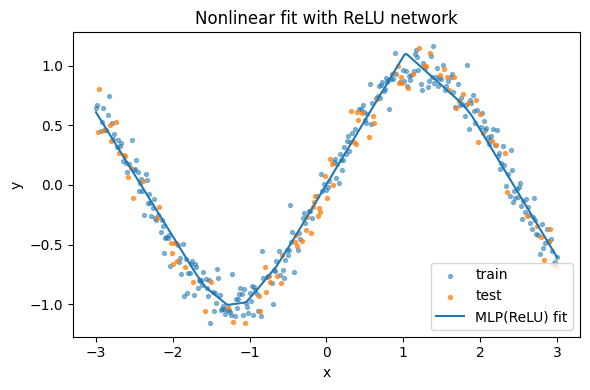

In [5]:

mlp = MLPRegressor(hidden_layer_sizes=(20,), activation="relu",
                   solver="adam", learning_rate_init=0.01,
                   max_iter=4000, random_state=2)
mlp.fit(Xtr, ytr)

xg = np.linspace(-3, 3, 300).reshape(-1,1)
plt.figure(figsize=(6,4))
plt.scatter(Xtr[:,0], ytr, s=8, alpha=0.5, label="train")
plt.scatter(Xte[:,0], yte, s=8, alpha=0.7, label="test")
plt.plot(xg[:,0], mlp.predict(xg), label="MLP(ReLU) fit")
plt.title("Nonlinear fit with ReLU network")
plt.xlabel("x"); plt.ylabel("y")
plt.legend(); plt.tight_layout(); plt.show()



## 5) A 2D surface learned by a small MLP


/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jihunmoon/PythonProjects/Git/ust-mail/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: in

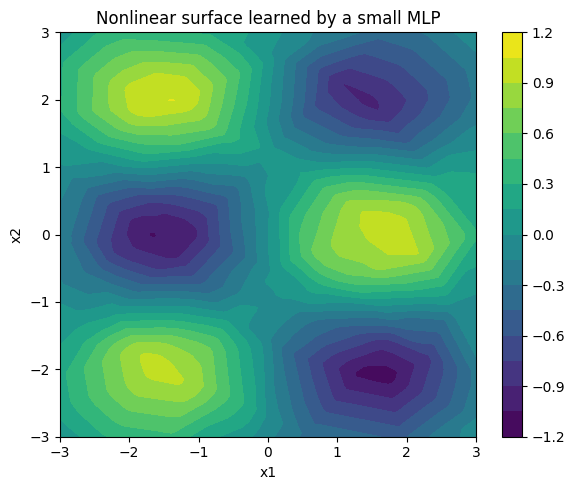

In [6]:

def target_fn(X):
    x1, x2 = X[:,0], X[:,1]
    return np.sin(x1) * np.cos(1.5*x2)

N = 1500
X2 = np.random.uniform(-3, 3, size=(N, 2))
y2 = target_fn(X2) + 0.05*np.random.randn(N)

X2_tr, X2_te, y2_tr, y2_te = train_test_split(X2, y2, test_size=0.25, random_state=2)
mlp2 = MLPRegressor(hidden_layer_sizes=(32, 16), activation="relu",
                    solver="adam", learning_rate_init=0.01,
                    max_iter=4000, random_state=2).fit(X2_tr, y2_tr)

gx = np.linspace(-3, 3, 120)
gy = np.linspace(-3, 3, 120)
XX, YY = np.meshgrid(gx, gy)
grid = np.c_[XX.ravel(), YY.ravel()]
Z = mlp2.predict(grid).reshape(XX.shape)

plt.figure(figsize=(6,5))
cs = plt.contourf(XX, YY, Z, levels=20)
plt.colorbar(cs)
plt.title("Nonlinear surface learned by a small MLP")
plt.xlabel("x1"); plt.ylabel("x2")
plt.tight_layout(); plt.show()
